In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon (only needs to be done once)
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import mean_squared_error

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anant\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anant\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
merged_df = pd.read_csv('df_with_sentimentscore_and_merged.csv')

In [4]:
merged_df.head(2)

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,stars_x,sentiment_score,useful,funny,cool
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN,4.857143,0.656614,9,3,1
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",3.133333,0.618500,19,6,6


In [8]:

# Aggregate review data by business
aggregated_reviews = merged_df.groupby('business_id').agg({
    'stars_x': 'mean',  # Average review star rating
    'sentiment_score': 'mean',  # Average sentiment score
    'useful': 'sum',  # Total useful votes
    'funny': 'sum',  # Total funny votes
    'cool': 'sum'    # Total cool votes
}).reset_index()

# Merge aggregated data with business data
# final_df = business_df.merge(aggregated_reviews, on='business_id', how='left')

# Feature selection
features = [
    'review_count', 'stars_x', 'sentiment_score',
    'useful', 'funny', 'cool'
]
X = merged_df[features].fillna(0)
y = merged_df['stars']  # Target variable

# Train-test split


In [10]:
X.head()

,review_count,stars_x,sentiment_score,useful,funny,cool
0,7,4.857143,0.656614,9,3,1
1,15,3.133333,0.618500,19,6,6
2,22,3.500000,0.794850,21,20,12
3,80,4.057471,0.695723,131,47,95
4,13,4.692308,0.888331,2,0,0


In [11]:
y.head(2)

0    5.0
1    3.0
Name: stars, dtype: float64

In [12]:
features = [
    'review_count', 'sentiment_score'
]
X = merged_df[features].fillna(0)

In [13]:
X.head(2)

,review_count,sentiment_score
0,7,0.656614
1,15,0.618500


In [15]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

c:\Users\anant\anaconda3\envs\DL\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE for X (review_count and Sentiment score): 0.49452430390085755
Model Performance Metrics:
Root Mean Squared Error (RMSE): 0.4945
Mean Absolute Error (MAE): 0.3788
R² Score: 0.7442


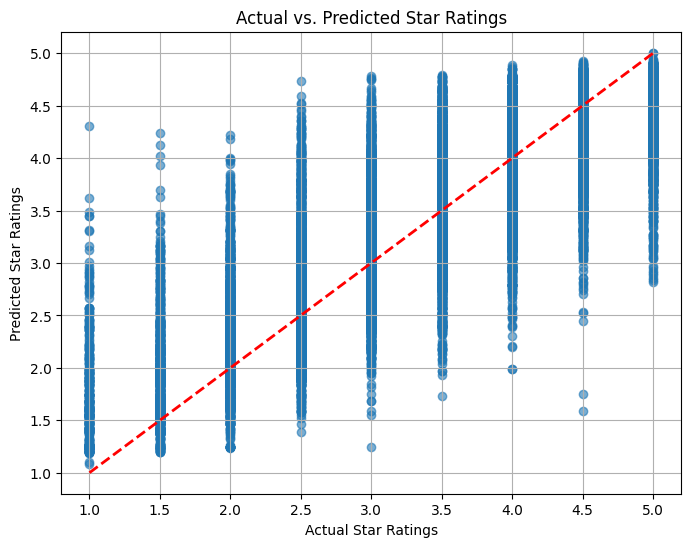

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE for X (review_count and Sentiment score): {rmse}")


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title("Actual vs. Predicted Star Ratings")
plt.xlabel("Actual Star Ratings")
plt.ylabel("Predicted Star Ratings")
plt.grid(True)
plt.show()



# Assuming "model" is your trained machine learning model

with open('my_model.pkl', 'wb') as file:

    pickle.dump(xgb, file) 
